This is purposefully a pretty quick and poorly-performing test, since we are not really training models for very long. Make sure you can run everything here successfully to get familiar with the BioAutoMATED platform!

In [1]:
import sys
sys.path.insert(1, './BioAutoMATED/main_classes/')
sys.path.append('./BioAutoMATED')
import warnings
warnings.filterwarnings("ignore")
from wrapper import run_bioautomated
import shutil
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# make directory where these results can live - no need to run if already have a directory
#os.mkdir('./exemplars/')

Using TensorFlow backend.


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

False

# General Parameters (can be changed)

### input arguments 
- task : str, one of 'binary_classification', 'multiclass_classification', 'regression'
- data_folder : str representing folder where data is stored
- data_file : str representing file name where data is stored
- sequence_type : str, either 'nucleic_acid', 'peptide', or 'glycan'
- model_folder : str representing folder where models are to be stored
- output_folder : str representing folder where output is to be stored
- automl_search_techniques : str representing which AutoML search technique should be performed, one of 'all', 'deepswarm', 'autokeras', 'tpot'
- do_backup : bool representing if a backup should be performed
- max_runtime_minutes : int representing max runtime for model search in minutes
- num_folds : int representing num folds
- verbosity : int representing 0=not verbose, 1=verbose
- do_auto_bin : bool representing if target values should be automatically binned
- bin_threshold : float representing threshold for positive and negative classes
- do_transform : bool representing if target values should be transformed
- input_col : str representing input column name where sequences can be located
- target_col : str representing target column name where target values can be located
- pad_seqs : str indicating pad_seqs method, either 'max', 'min', 'average'
- augment_data : str, either 'none', 'complement', 'reverse_complement', or 'both_complements'
- dataset_robustness : bool indicating if data ablation study should be performed
- num_final_epochs : int representing number of final epochs to train final deepswarm model
- yaml_params : dict of extra deepswarm parameters, with keys 'max_depth' (int), 'ant_count' (int), 'epochs' (int)
- num_generations : int representing number of generations of tpot search
- population_size : int representing population size of tpot search
- run_interpretation : bool indicating if interpretation module should be executed
- interpret_params : dict of extra interpretation parameters, with keys 'sample_number_class_activation_maps' (int), 'class_activation_grad_modifier' (str), 'class_activation_layer_index' (int), 'sample_number_saliency_maps' (int), 'saliency_map_grad_modifier' (str), 'saliency_map_layer_index' (int), 'sample_number_mutagenesis' (int)
- run_design : bool indicating if design module should be executed
- design_params : dict of extra design parameters, with keys 'k' (int), 'substitution_type' (str), 'target_y' (float), 'class_of_interest' (int), 'constraint_file_path' (str), 'de_novo_num_seqs_to_test' (int), 'storm_num_seqs_to_test' (int), 'num_of_optimization_rounds' (int)

In [3]:
# specify parameters for the actual search (example)
max_runtime_minutes = 60 # time in minutes to give to each implemented AutoML algorithms
num_folds = 2 # recommend 3 - 5 folds for robustness

# Deepswarm execution
num_final_epochs = 10
yaml_params = {'ant_count': 1, 'max_depth': 2, 'epochs': 5}

# TPOT execution
num_generations = 5
population_size = 5

Note that this runtime (10 minutes) may be too short for your machine's computing capabilites (see note under Troubleshooting in the Installation Guide). If so, please change max_runtime_minutes to 60. Make sure to reset the graph operations of BioAutoMATED by restarting the kernel (Kernel --> Restart) before trying to run again.

# Synthetic Nucleic Acids Dataset

Verbosity set to 1. For fewer display items, set verbosity to 0.
#################################################################################################
#######################               RUNNING REGRESSION                  #######################
#################################################################################################

#################################################################################################
##############################            RUNNING DEEPSWARM           ###########################
#################################################################################################
Conducting architecture search now...
Example of bad letter K: NKATGGCTGATACAAAAGCAAAACTCACCCTCAACGGGGATACAGCTGTTGAACTGGATGTGCTGAAAGGCACGCTGGGTCAAGATGTTATTGATATCCGTACTCTCGGTTCAAAAGGTGTGTTCACCTTTGACCCAGGCTTCACTTCAACCGCATCCTGCGAATCTAAAATTACTTTTATT
Example of bad letter W: WTATGTCAGAACGTTTCCCAAATGACGTGGATCCGATCGAAACTCGCGACTGGCTCCAGGCGATCGAATCGGTCA

-------------------------------DeepSwarm settings-------------------------------
{
    "DeepSwarm": {
        "aco": {
            "ant_count": 1,
            "greediness": 0.5,
            "pheromone": {
                "decay": 0.1,
                "evaporation": 0.1,
                "start": 0.1,
                "verbose": false
            }
        },
        "backend": {
            "batch_size": 64,
            "epochs": 5,
            "loss": "mean_squared_error",
            "patience": 5,
            "verbose": 1
        },
        "flat_nodes": [
            "FlattenNode",
            "DenseNode",
            "DropoutFlatNode",
            "BatchNormalizationFlatNode"
        ],
        "max_depth": 2,
        "metrics": "loss",
        "reuse_patience": 1,
        "save_folder": "./wenxiao1117/output/R_P/models/deepswarm/regression/",
        "spatial_nodes": [
            "InputNode",
            "Conv2DNode",
            "DropoutSpatialNode",
            "BatchNormalizati

Confirmed: Scrambled control generated.
Deepswarm TFK Backend: Created!
Deepswarm Object: Created!


------------------------------STARTING ACO SEARCH-------------------------------


Train on 332 samples, validate on 37 samples
Epoch 1/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.3830 - mean_squared_error: 0.3830
Epoch 00001: val_loss improved from inf to 0.28527, saving model to temp-model
332/332 [==============================] - 0s 556us/sample - loss: 0.4229 - mean_squared_error: 0.4229 - val_loss: 0.2853 - val_mean_squared_error: 0.2853
Epoch 2/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.2395 - mean_squared_error: 0.2395
Epoch 00002: val_loss did not improve from 0.28527
332/332 [==============================] - 0s 99us/sample - loss: 0.2491 - mean_squared_error: 0.2491 - val_loss: 0.2903 - val_mean_squared_error: 0.2903
Epoch 3/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.1660 - mean_squared_error: 0.1660
Epoch 00003: val_loss improved from 0.28527 to 0.24151, saving model to temp-model
332/332 [==============================] - 0s 117us/sample - loss: 0.1805 - mean_squared_error: 0.1805 - val_loss: 0.2

 Ant: 0x7fcea82c5090 
 Loss: 0.273227 
 Accuracy: 0.273227 
 Path: InputNode(shape:(238, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: a06752bc481afbeb02c5736e96988ecb5842abdb320192996a72930e5faf9d5c 
---------------------------Current search depth is 1----------------------------
--------------------------------GENERATING ANT 1--------------------------------


Train on 332 samples, validate on 37 samples
Epoch 1/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.3695 - mean_squared_error: 0.3695
Epoch 00001: val_loss improved from inf to 0.40883, saving model to temp-model
332/332 [==============================] - 0s 611us/sample - loss: 0.9914 - mean_squared_error: 0.9914 - val_loss: 0.4088 - val_mean_squared_error: 0.4088
Epoch 2/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.2521 - mean_squared_error: 0.2521
Epoch 00002: val_loss improved from 0.40883 to 0.22398, saving model to temp-model
332/332 [==============================] - 1s 4ms/sample - loss: 0.4909 - mean_squared_error: 0.4909 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 3/5
 64/332 [====>.........................] - ETA: 0s - loss: 0.2441 - mean_squared_error: 0.2441
Epoch 00003: val_loss did not improve from 0.22398
332/332 [==============================] - 0s 175us/sample - loss: 0.2894 - mean_squared_error: 0.2894 - val_loss: 0.37

 Ant: 0x7fce9eea83d0 
 Loss: 0.353073 
 Accuracy: 0.353073 
 Path: InputNode(shape:(238, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:64, kernel_size:3) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 55d660000a58071e883a904d33668e455970dedc4ab7e0484fcab7e9a42e4d56 
---------------------------BEST ANT DURING ITERATION----------------------------
 Ant: 0x7fcea82c5090 
 Loss: 0.273227 
 Accuracy: 0.273227 
 Path: InputNode(shape:(238, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: a06752bc481afbeb02c5736e96988ecb5842abdb320192996a72930e5faf9d5c 
---------------------------Current search depth is 2----------------------------
--------------------------------GENERATING ANT 1--------------------------------


Train on 332 samples, validate on 37 samples
Epoch 1/5
320/332 [===========================>..] - ETA: 1s - loss: 0.3201 - mean_squared_error: 0.32 - ETA: 1s - loss: 0.2858 - mean_squared_error: 0.28 - ETA: 0s - loss: 0.3064 - mean_squared_error: 0.30 - ETA: 0s - loss: 0.3232 - mean_squared_error: 0.32 - ETA: 0s - loss: 0.3277 - mean_squared_error: 0.3277
Epoch 00001: val_loss improved from inf to 0.30119, saving model to temp-model
332/332 [==============================] - 2s 6ms/sample - loss: 0.3255 - mean_squared_error: 0.3255 - val_loss: 0.3012 - val_mean_squared_error: 0.3012
Epoch 2/5
320/332 [===========================>..] - ETA: 1s - loss: 0.2275 - mean_squared_error: 0.22 - ETA: 1s - loss: 0.2765 - mean_squared_error: 0.27 - ETA: 0s - loss: 0.2796 - mean_squared_error: 0.27 - ETA: 0s - loss: 0.2666 - mean_squared_error: 0.26 - ETA: 0s - loss: 0.2549 - mean_squared_error: 0.2549
Epoch 00002: val_loss improved from 0.30119 to 0.25544, saving model to temp-model
332/332 [=====

 Ant: 0x7fce973f0110 
 Loss: 0.288388 
 Accuracy: 0.288388 
 Path: InputNode(shape:(238, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:64, kernel_size:5) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:7) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: 30cf8f070cfc3f1fe6e85d916a9c1c7efdc6ac1ff799b900dc11aa365721676f 
---------------------------BEST ANT DURING ITERATION----------------------------
 Ant: 0x7fcea82c5090 
 Loss: 0.273227 
 Accuracy: 0.273227 
 Path: InputNode(shape:(238, 4, 1)) -> Conv2DNode(activation:ReLU, filter_count:16, kernel_size:5) -> FlattenNode() -> OutputNode(activation:Linear, output_size:1, shape:1) 
 Hash: a06752bc481afbeb02c5736e96988ecb5842abdb320192996a72930e5faf9d5c 


Deepswarm Topology: Found!


-----------------------EVALUATING PERFORMANCE ON TEST SET-----------------------


247/247 [==============================] - ETA: 0s - loss: 0.1345 - mean_squared_error: 0.13 - 0s 149us/sample - loss: 0.2732 - mean_squared_error: 0.2732


Accuracy is 0.273227 and loss is 0.273227


Deepswarm Preliminary Topology Evaluation: Done!
247/247 [==============================] - ETA: 0s - loss: 0.1345 - mean_squared_error: 0.13 - 0s 55us/sample - loss: 0.2732 - mean_squared_error: 0.2732
Epoch 1/10
37/37 [==============================] ETA: 0s - loss: 0.1537 - mean_squared_error: 0.1537 - ETA: 0s - loss: 0.1411 - mean_squared_error: 0.14 - 0s 185us/sample - loss: 0.1449 - mean_squared_error: 0.1456

Epoch 00001: val_loss improved from inf to 0.12083, saving model to temp-model
6/6 [==============================] - 0s 30ms/step - loss: 0.1287 - mean_squared_error: 0.1262 - val_loss: 0.1208 - val_mean_squared_error: 0.1456
Epoch 2/10
37/37 [==============================] ETA: 0s - loss: 0.1044 - mean_squared_error: 0.1044 - 0s 53us/sample - loss: 0.1343 - mean_squared_error: 0.1343

Epoch 00002: val_loss did not improve from 0.12083
6/6 [==============================] - 0s 6ms/step - loss: 0.1293 - mean_squared_error: 0.1295 - val_loss: 0.1343 - val_mean_squared_error

-----------------------EVALUATING PERFORMANCE ON TEST SET-----------------------


247/247 [==============================] - ETA: 0s - loss: 0.1345 - mean_squared_error: 0.13 - 0s 163us/sample - loss: 0.2732 - mean_squared_error: 0.2732


Accuracy is 0.273227 and loss is 0.273227


Deepswarm Topology Evaluation: Completed!
Deepswarm Results: Saved!
Current fold: 1
Train on 277 samples, validate on 31 samples
Epoch 1/10
277/277 [==============================] - ETA: 0s - loss: 0.1894 - mean_squared_error: 0.18 - 0s 507us/sample - loss: 0.2354 - mean_squared_error: 0.2354 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 2/10
308/308 [==============================] - ETA: 0s - loss: 0.3543 - mean_squared_error: 0.35 - 0s 48us/sample - loss: 0.2498 - mean_squared_error: 0.2498


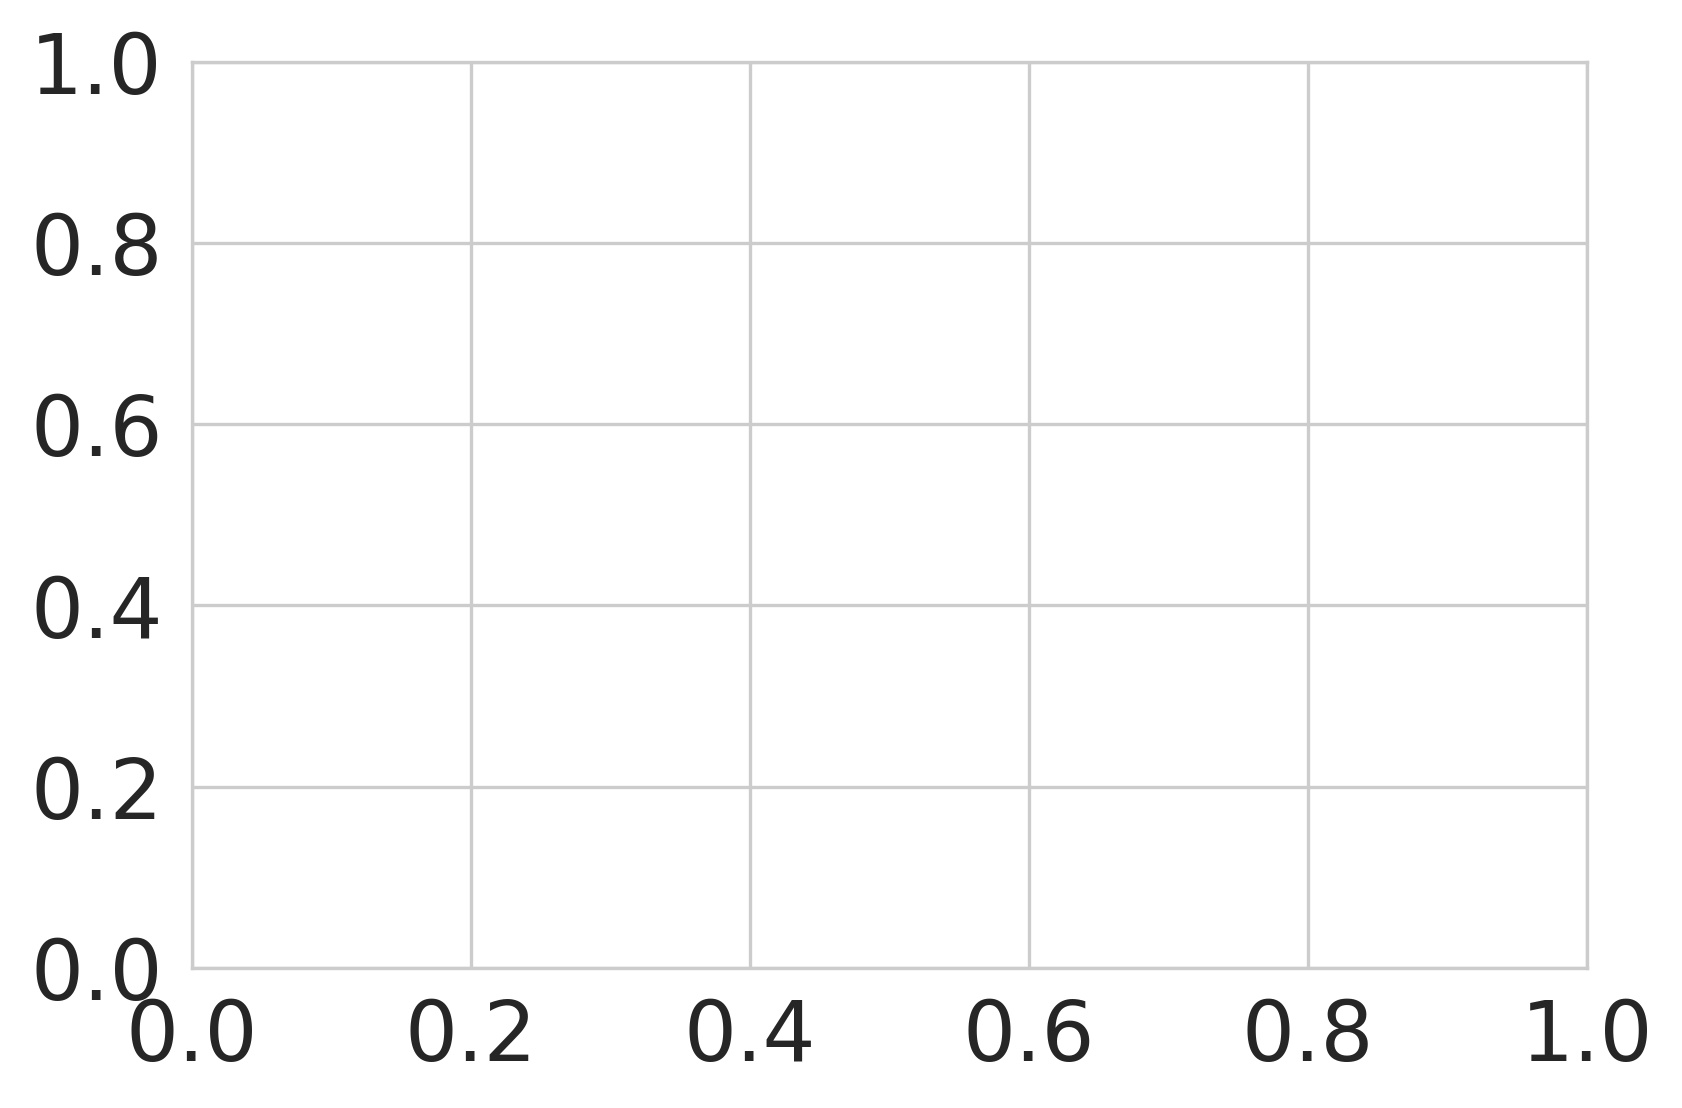

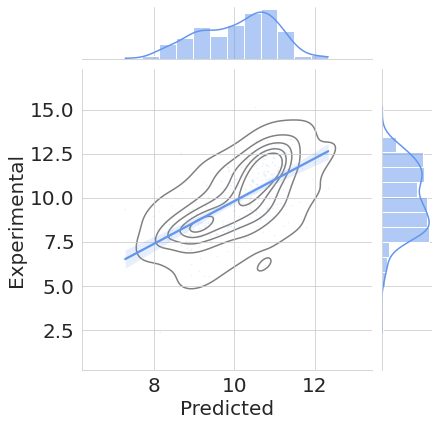

Current fold: 2
Train on 277 samples, validate on 31 samples
Epoch 1/10
277/277 [==============================] - ETA: 0s - loss: 0.2086 - mean_squared_error: 0.20 - 0s 575us/sample - loss: 0.2406 - mean_squared_error: 0.2406 - val_loss: 0.3092 - val_mean_squared_error: 0.3092
Epoch 2/10
308/308 [==============================] - ETA: 0s - loss: 0.1285 - mean_squared_error: 0.12 - 0s 41us/sample - loss: 0.1813 - mean_squared_error: 0.1813


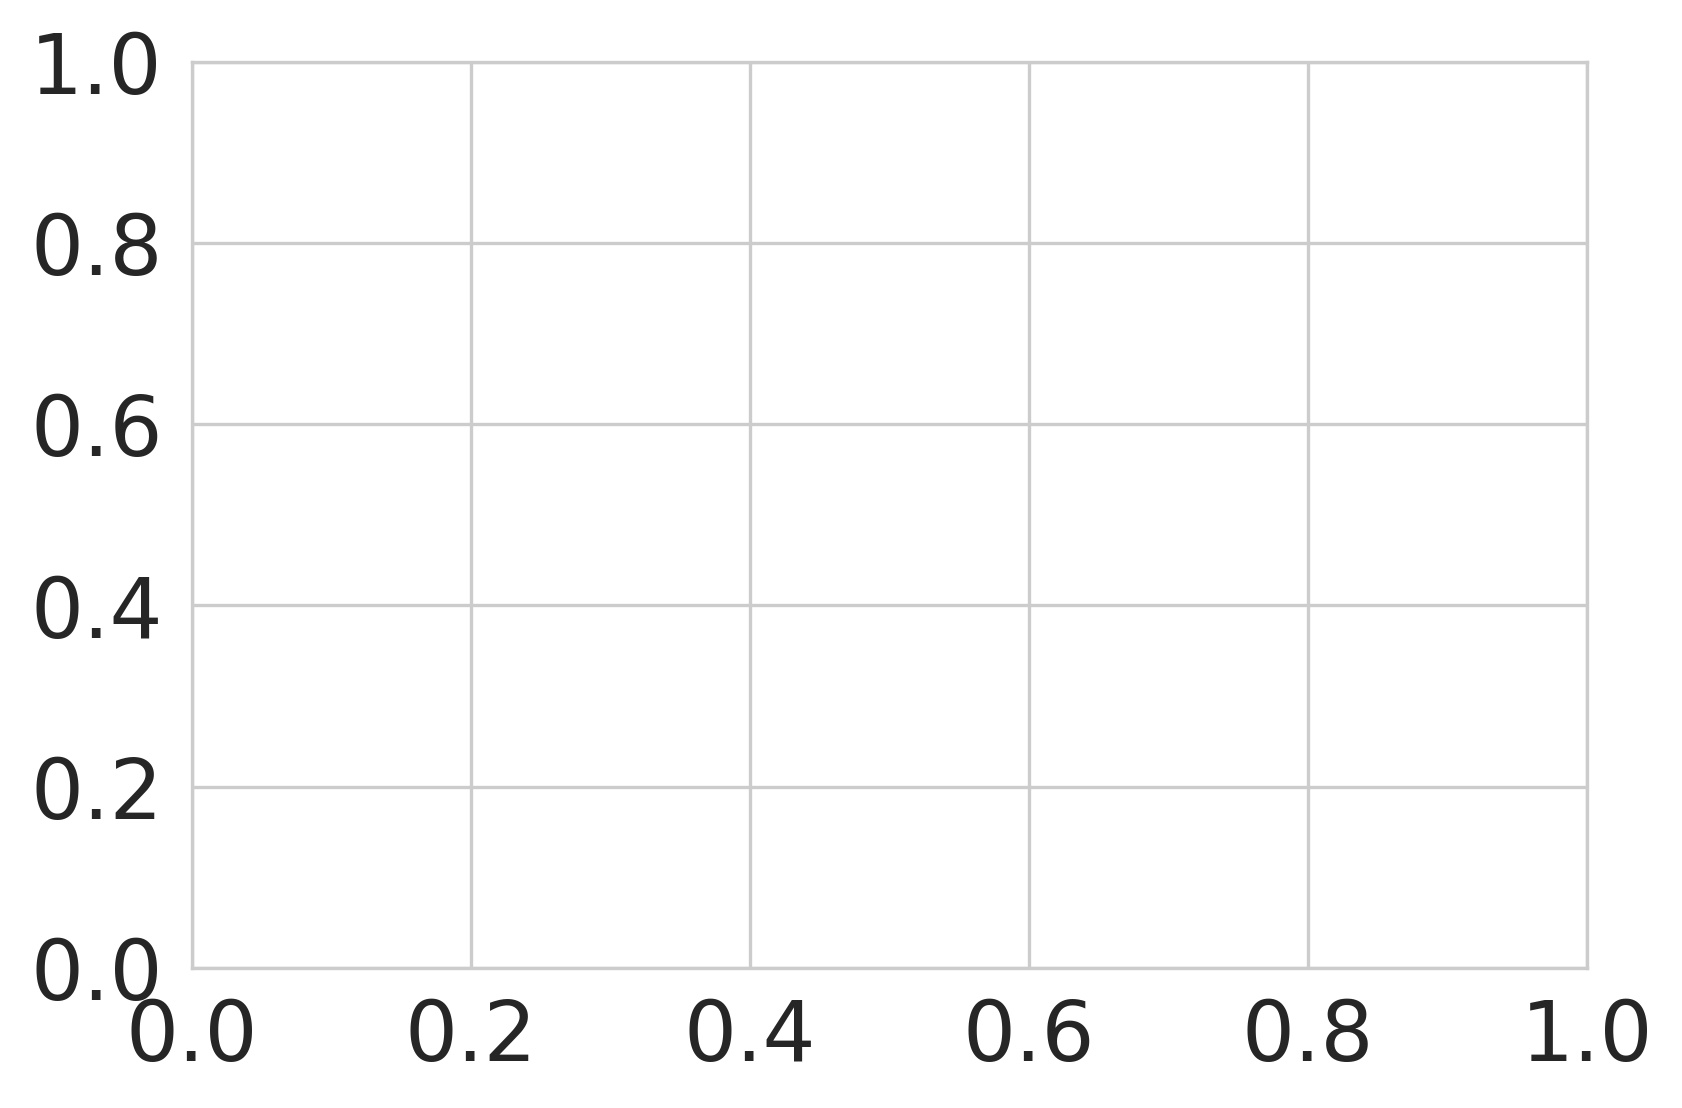

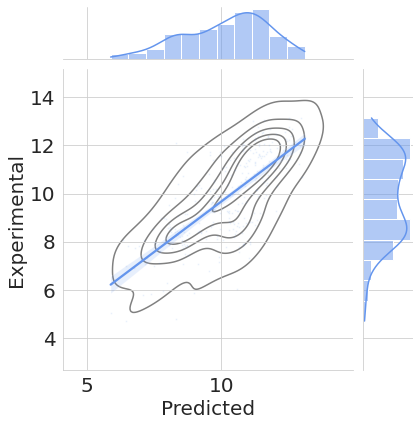

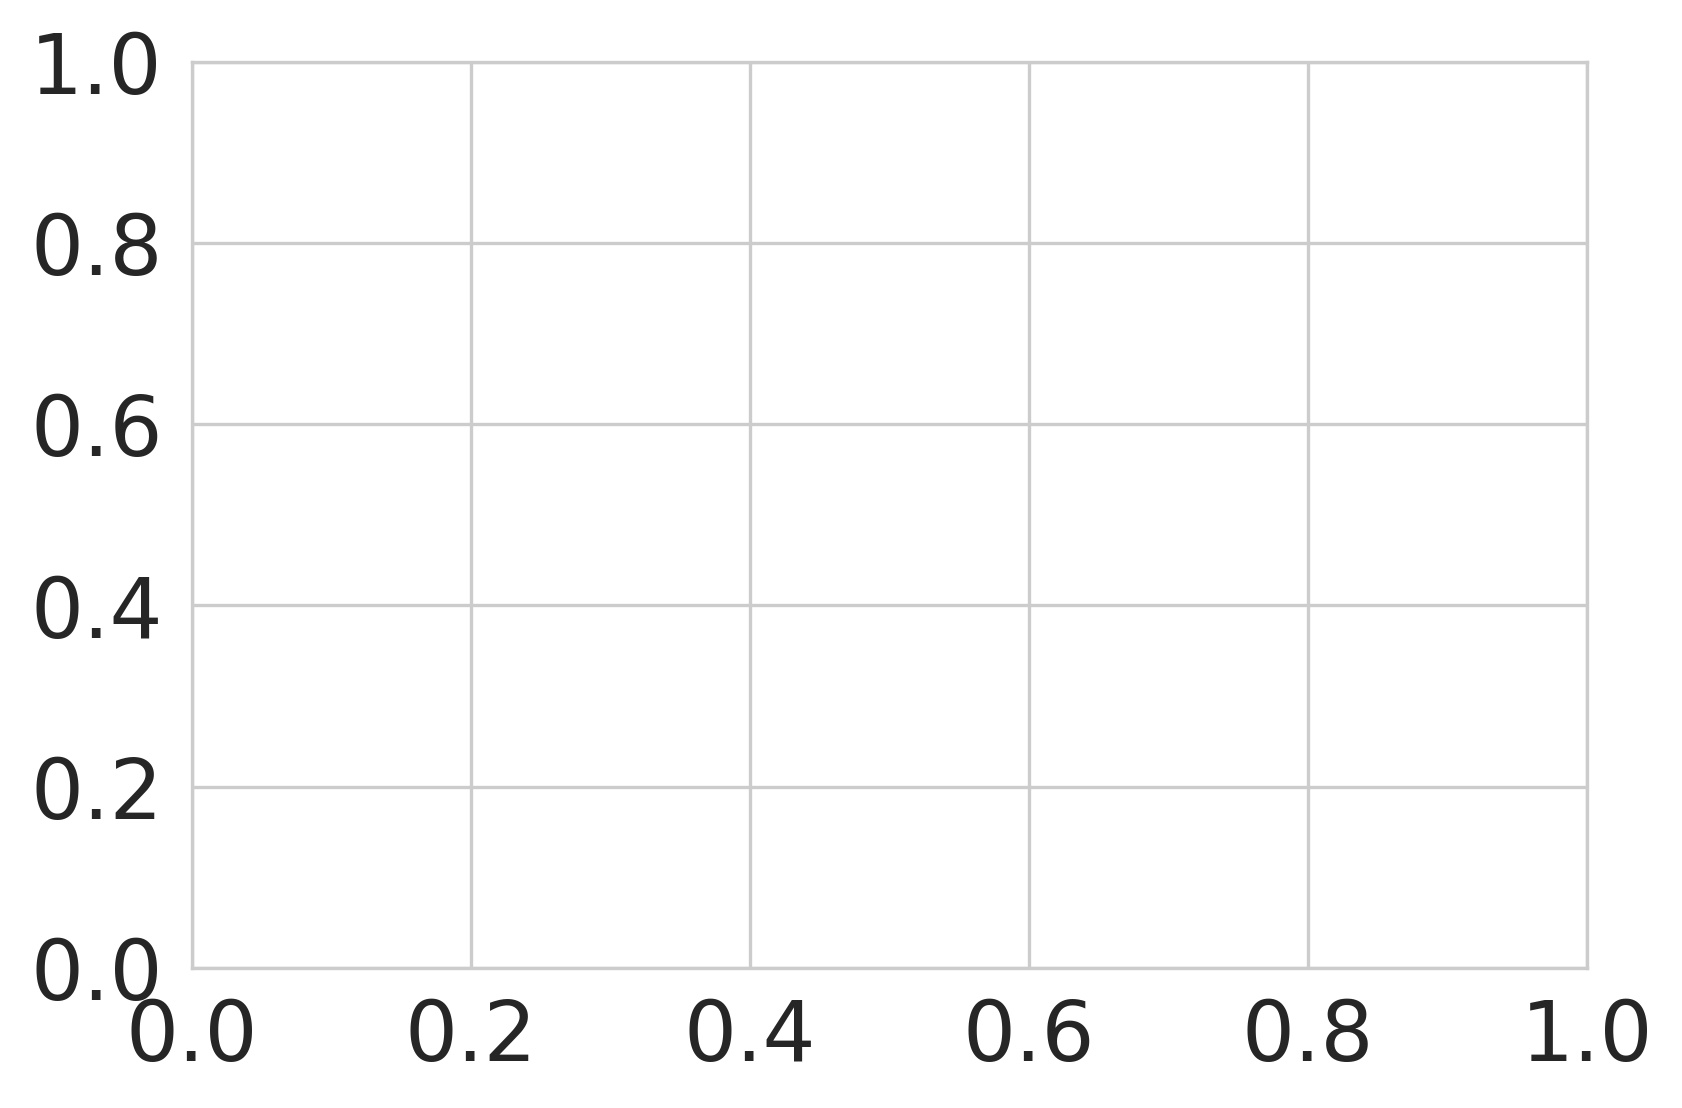

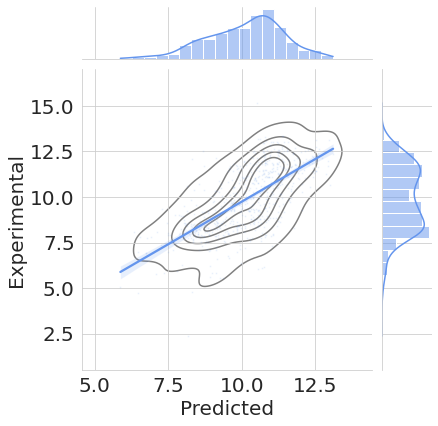

Metrics over folds: 
	Average r2:  0.46171135843344285
	Std of r2:  0.08325160717875585
	Overall r2: 0.4407310649394694, Average r2 over folds: 0.46171135843344285
Testing scrambled control now...
Current fold: 1
Train on 277 samples, validate on 31 samples
Epoch 1/10
277/277 [==============================] - 0s 612us/sample - loss: 0.4244 - mean_squared_error: 0.4244 - val_loss: 0.3690 - val_mean_squared_error: 0.3690
Epoch 2/10
277/277 [==============================] - 0s 122us/sample - loss: 0.3109 - mean_squared_error: 0.3109 - val_loss: 0.3655 - val_mean_squared_error: 0.3655
Epoch 3/10
277/277 [==============================] - 0s 97us/sample - loss: 0.2312 - mean_squared_error: 0.2312 - val_loss: 0.2893 - val_mean_squared_error: 0.2893
Epoch 4/10
308/308 [==============================] - 0s 44us/sample - loss: 0.4031 - mean_squared_error: 0.4031


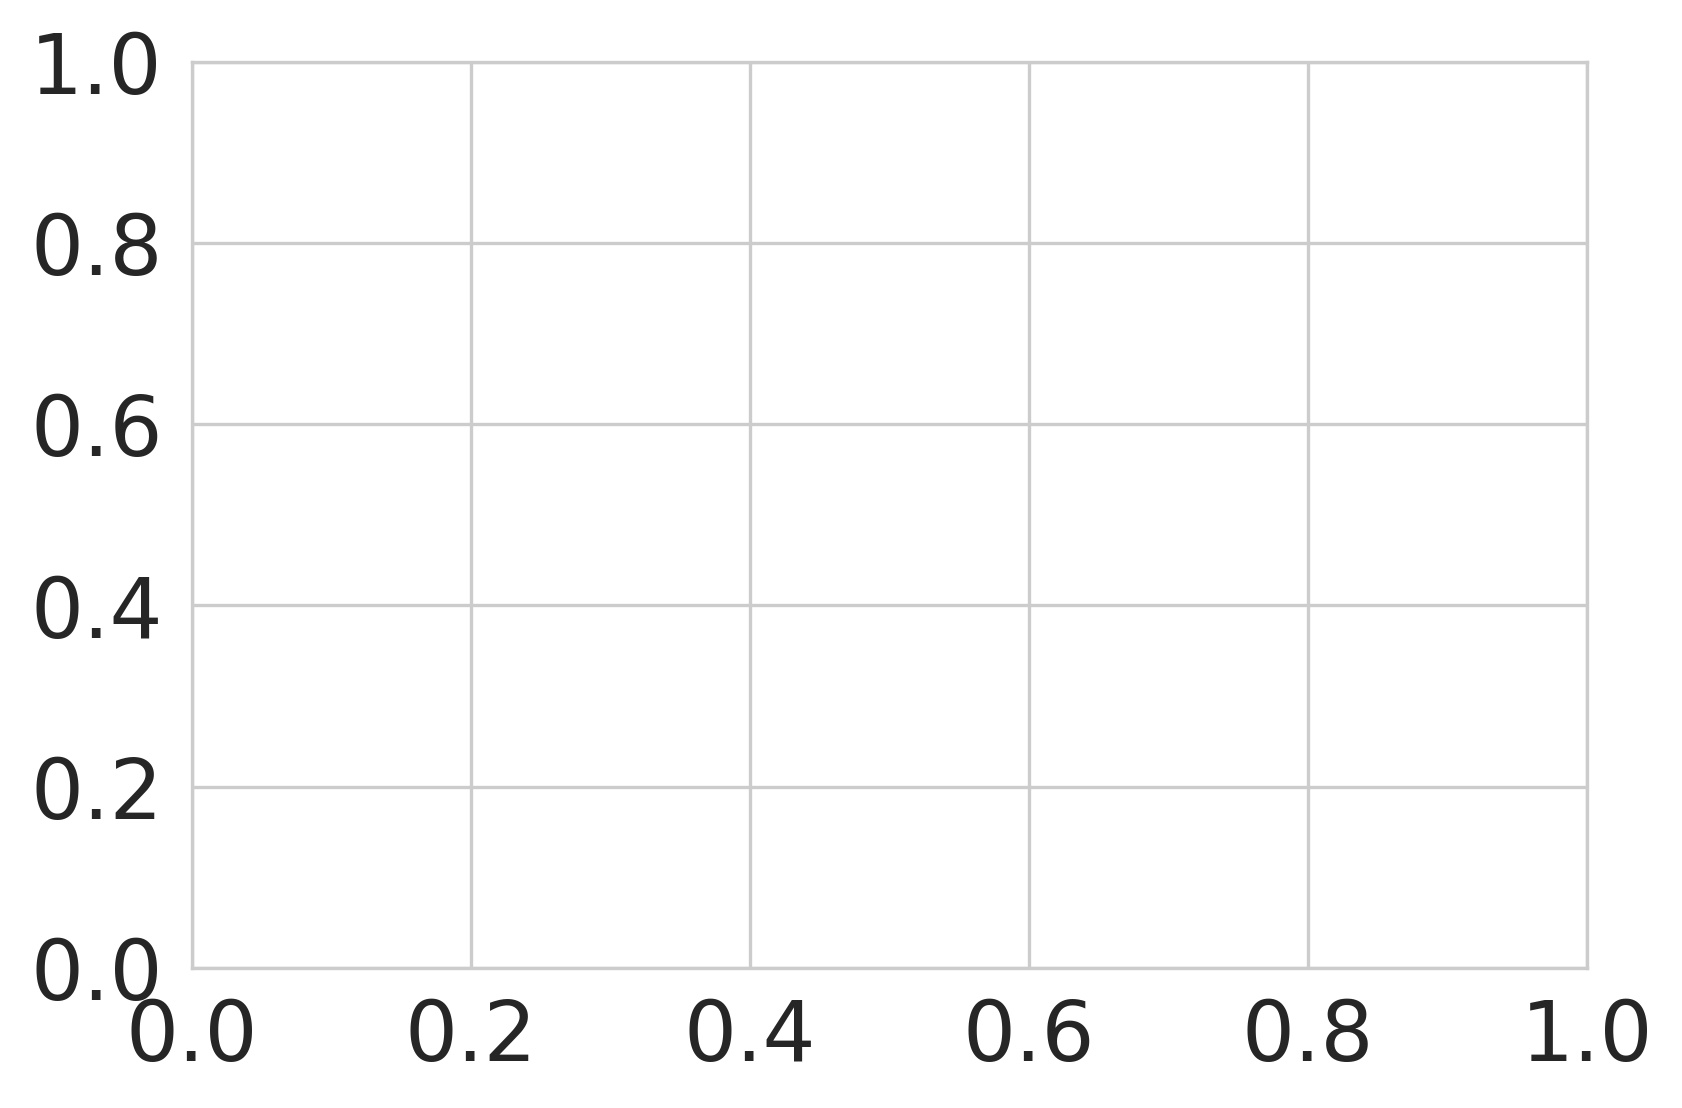

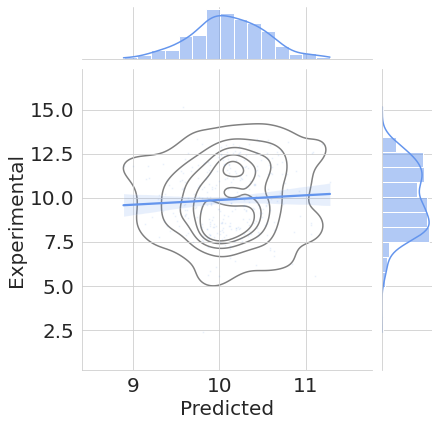

Current fold: 2
Train on 277 samples, validate on 31 samples
Epoch 1/10
277/277 [==============================] - 0s 675us/sample - loss: 0.4330 - mean_squared_error: 0.4330 - val_loss: 0.5077 - val_mean_squared_error: 0.5077
Epoch 2/10
277/277 [==============================] - 0s 108us/sample - loss: 0.3097 - mean_squared_error: 0.3097 - val_loss: 0.3821 - val_mean_squared_error: 0.3821
Epoch 3/10
308/308 [==============================] - 0s 46us/sample - loss: 0.3430 - mean_squared_error: 0.3430


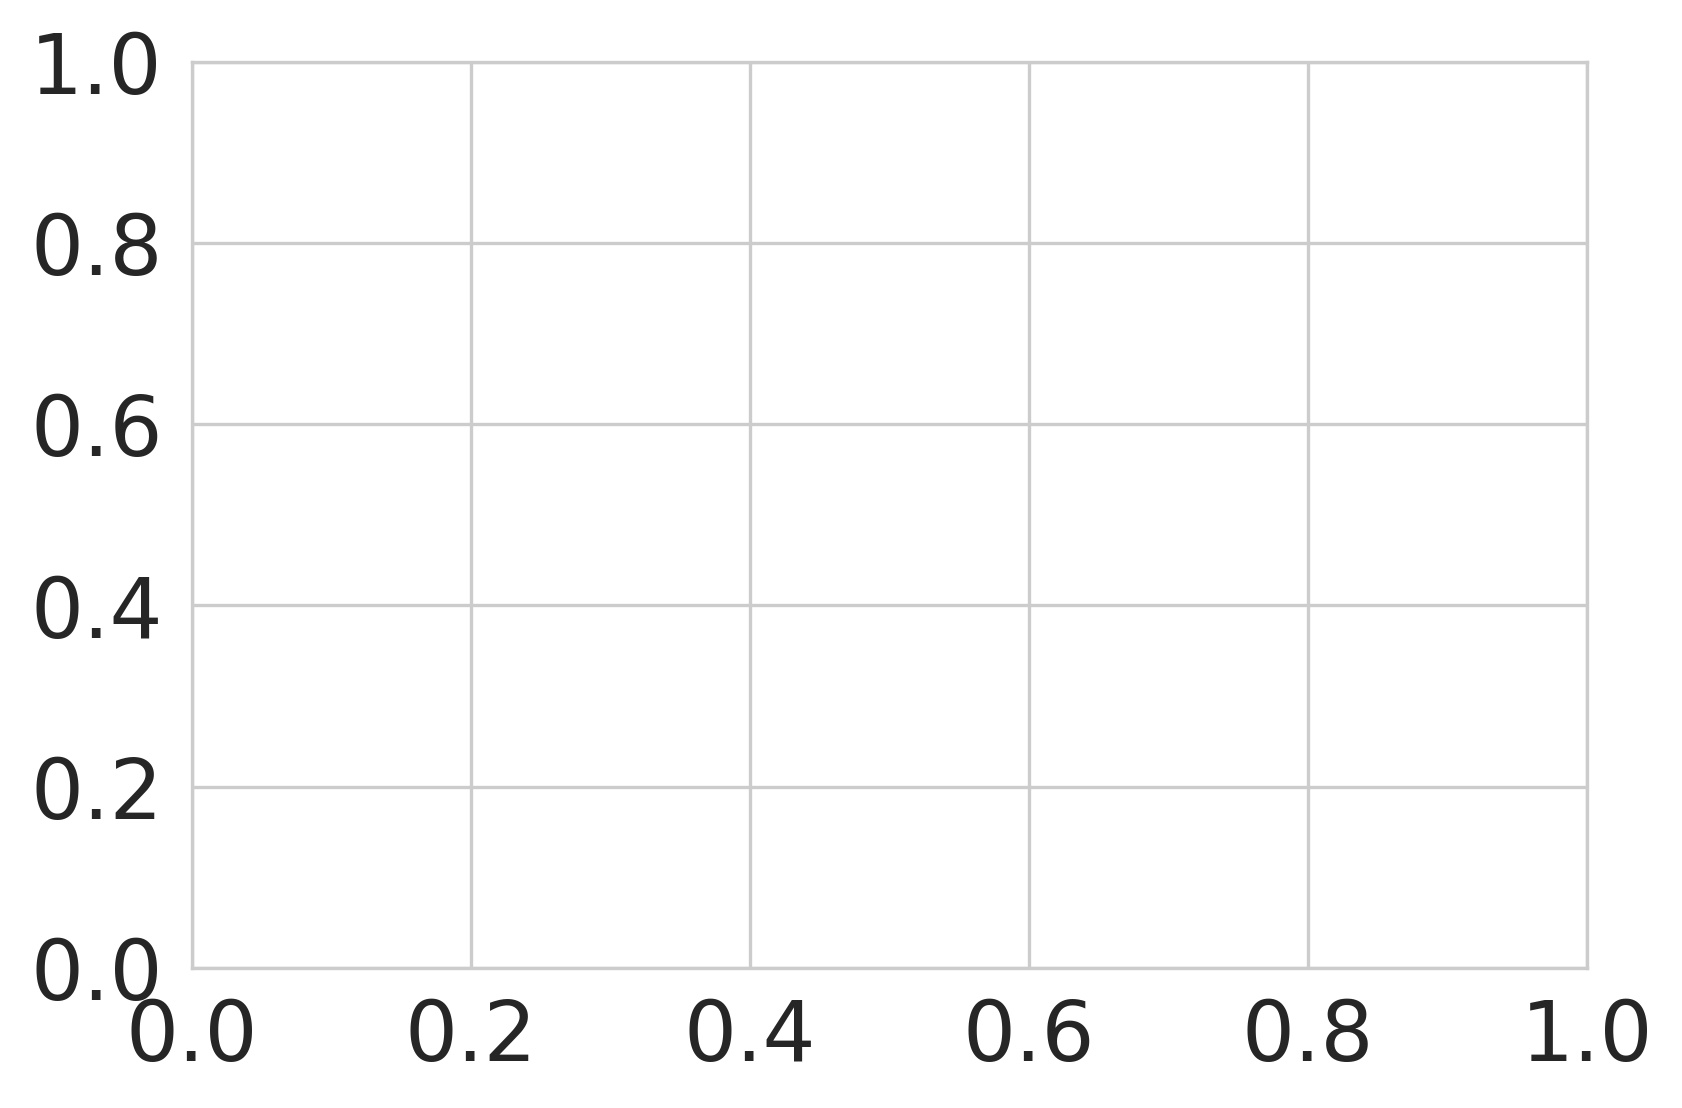

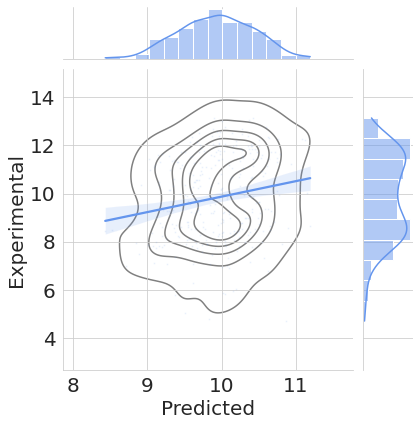

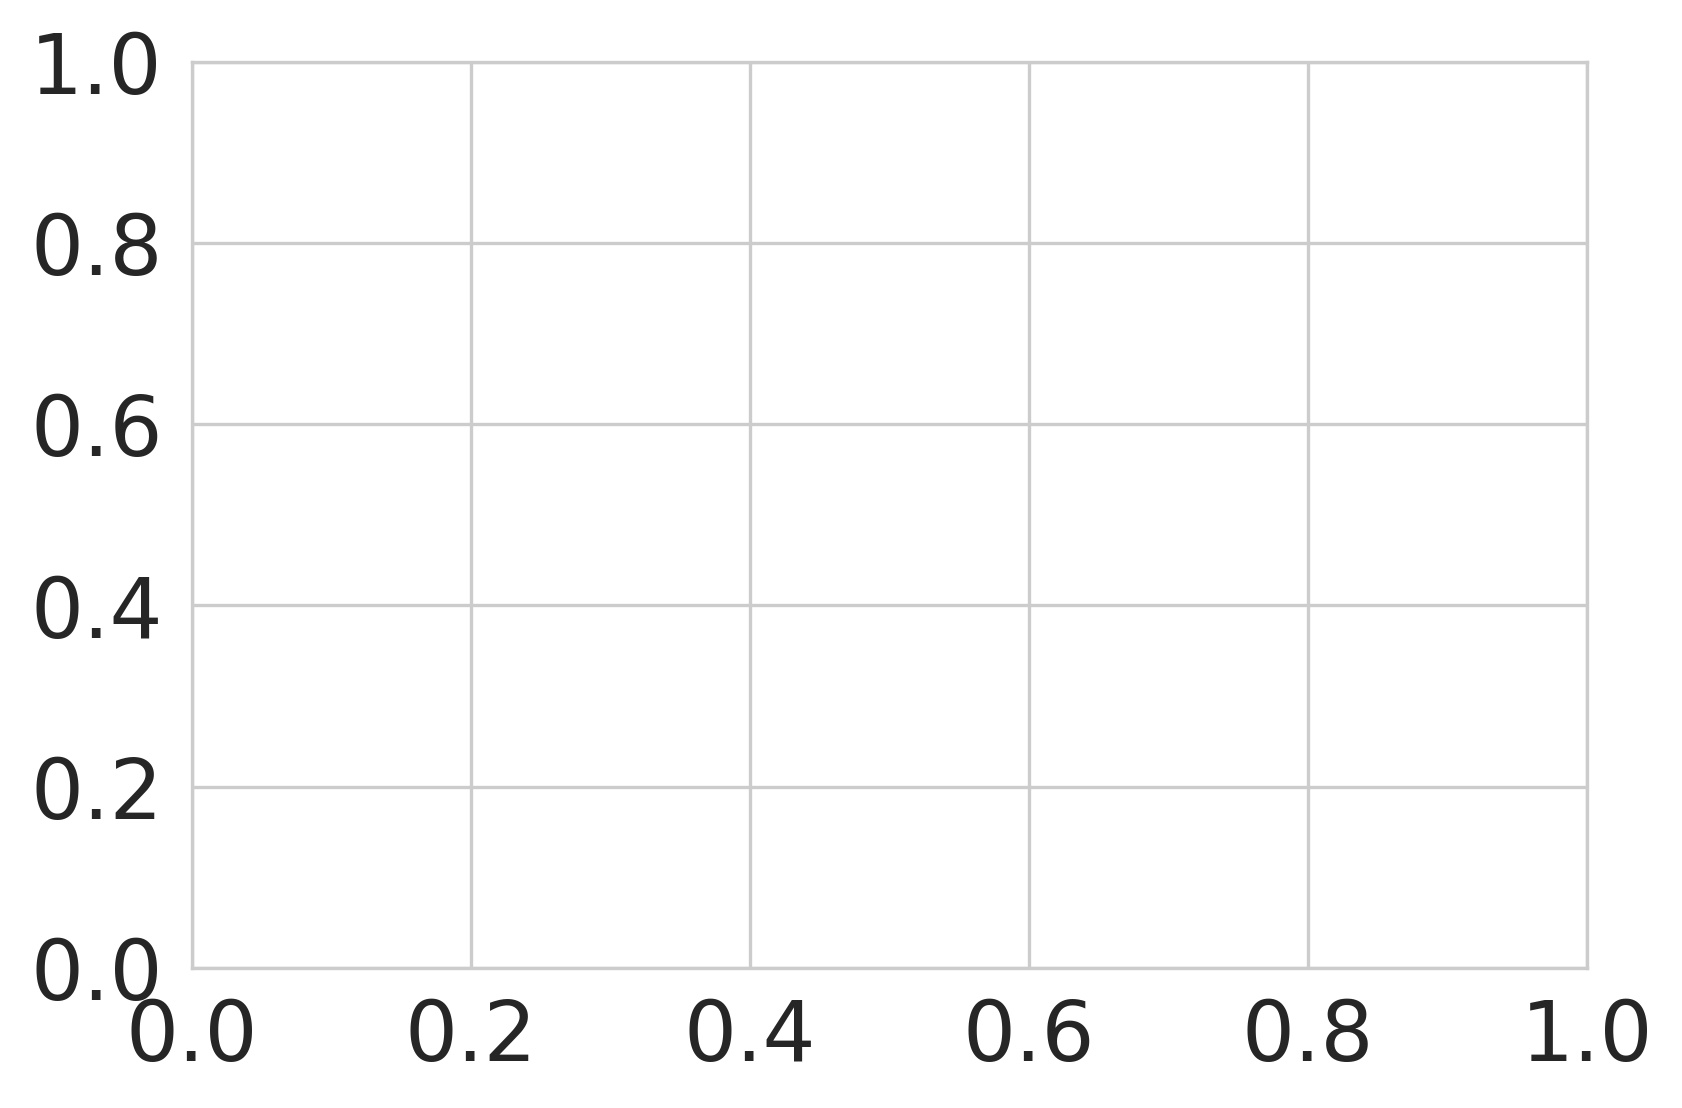

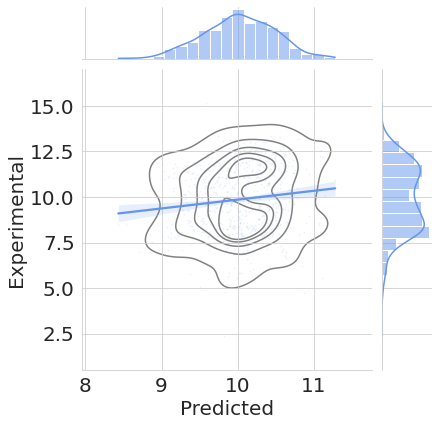

Metrics over folds: 
	Average r2:  0.018356747416976932
	Std of r2:  0.014664137229504394
	Overall r2: 0.01576207690485523, Average r2 over folds: 0.018356747416976932
Fitting final model now...
Train on 554 samples, validate on 62 samples
Epoch 1/10
554/554 [==============================] - 0s 426us/sample - loss: 0.1906 - mean_squared_error: 0.1906 - val_loss: 0.2293 - val_mean_squared_error: 0.2293
Epoch 2/10
554/554 [==============================] - 0s 106us/sample - loss: 0.1318 - mean_squared_error: 0.1318 - val_loss: 0.2380 - val_mean_squared_error: 0.2380
#################################################################################################
##############################            RUNNING AUTOKERAS           ###########################
#################################################################################################
Conducting architecture search now...
Example of bad letter K: NKATGGCTGATACAAAAGCAAAACTCACCCTCAACGGGGATACAGCTGTTGAACTGGATGTGCTGAAAGGC

In [4]:
os.mkdir('./ckpt/output/R_P/')

data_folder = './AutoML_Data_Process/data/'
data_file = 'R_P.csv'
input_col = 'Seq'
target_col = 'OD'
sequence_type = 'nucleic_acid'
verbosity = 1
task = 'regression' # binary_classification, multiclass_classification, regression

# Specify target folders for saving models and results
# Generic here - will add the tags specifying classification/regression
# as well as specific for the AutoML tool being used (i.e. /tpot/)
model_folder = './ckpt/output/R_P/models/'
output_folder = './ckpt/output/R_P/outputs/'

run_bioautomated(task, data_folder, data_file, sequence_type, model_folder, output_folder, input_col=input_col, target_col=target_col, max_runtime_minutes=max_runtime_minutes, num_folds=num_folds, verbosity=verbosity, num_final_epochs=num_final_epochs, yaml_params=yaml_params, num_generations=num_generations, population_size=population_size)
